In [2]:
# Using n = 30
import sys
import warnings
sys.path.append("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")
warnings.filterwarnings('ignore')
from stats import * 
from similar_plays import * 
import pandas as pd
from collections import Counter
import os 
os.chdir("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")
import seaborn as sns




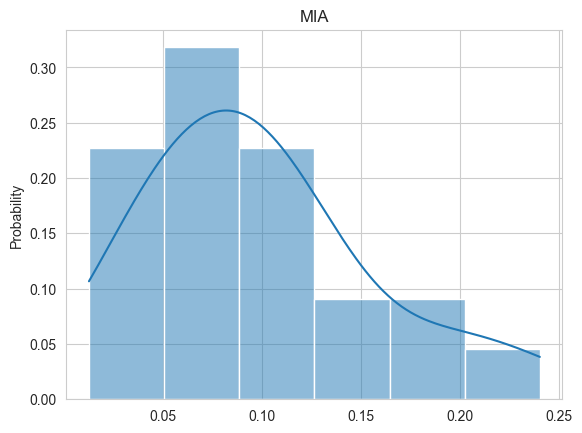

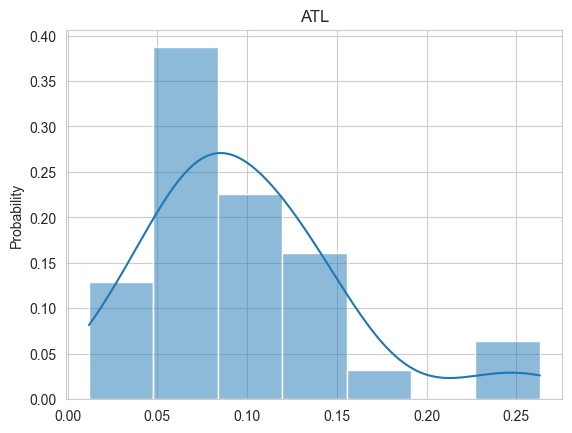

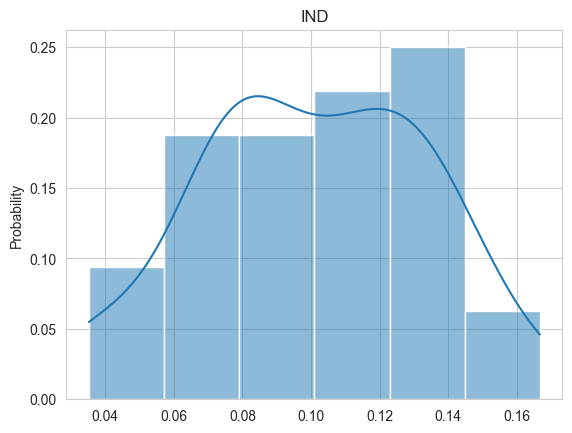

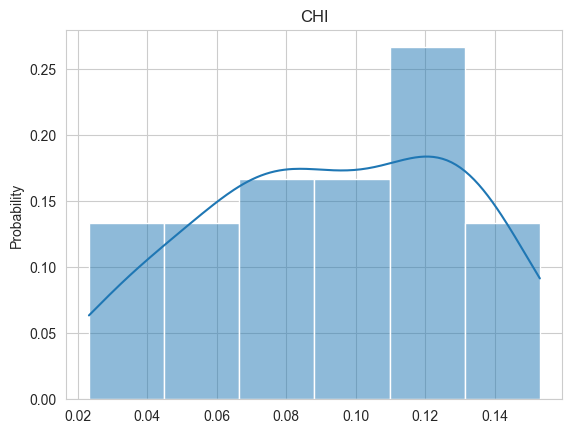

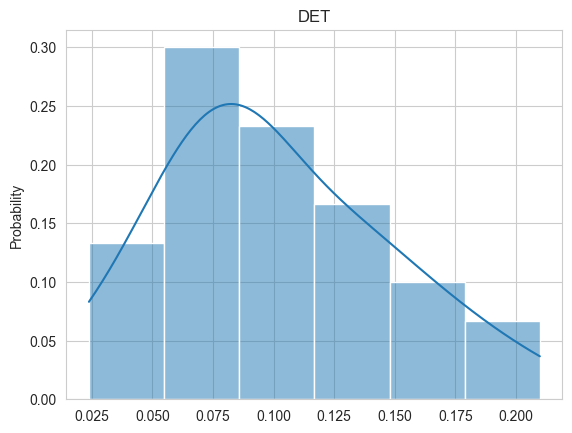

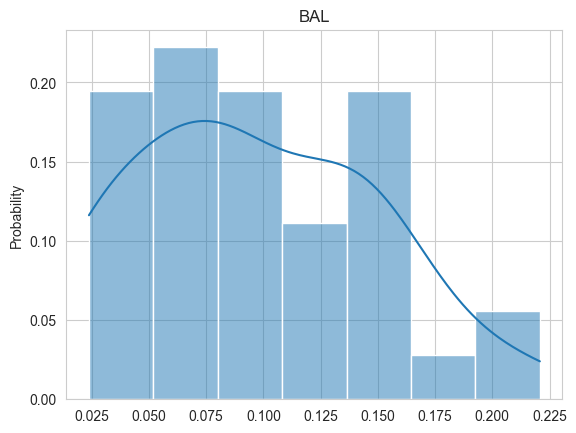

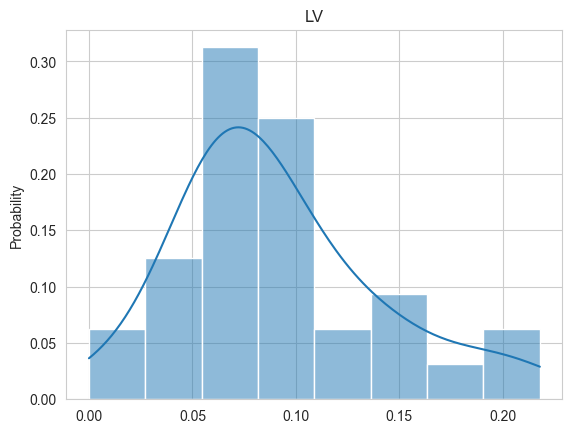

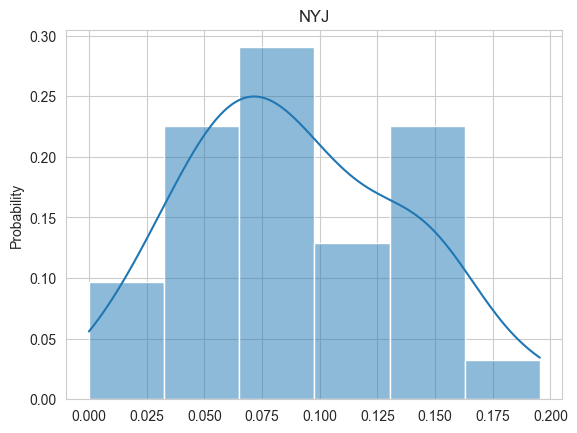

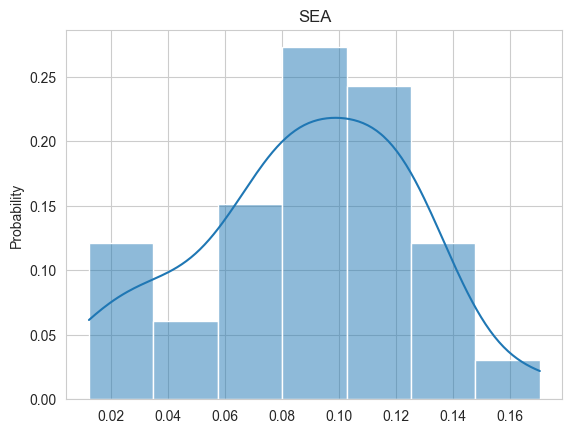

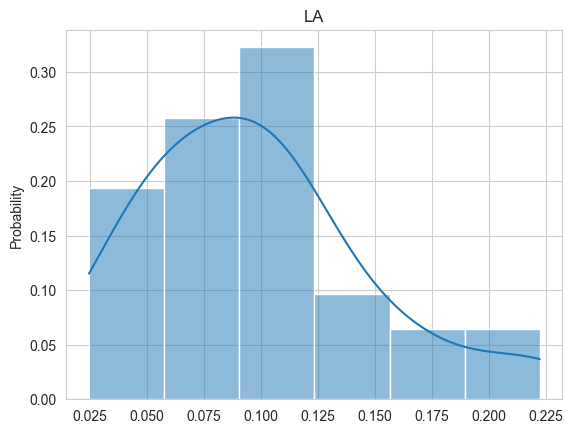

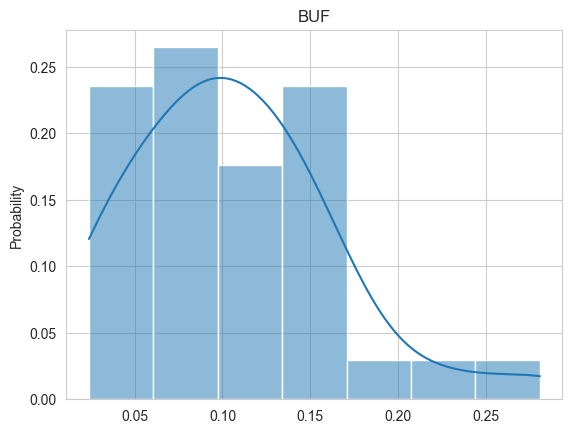

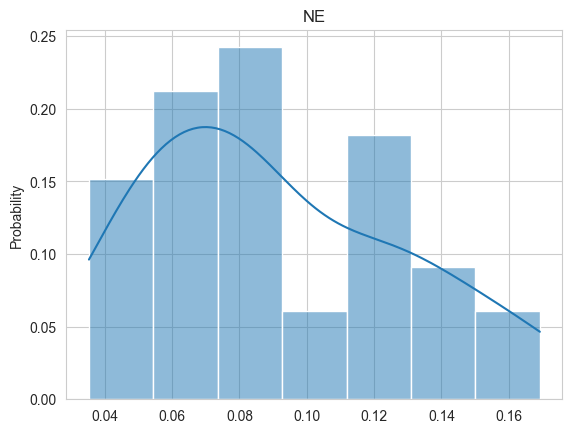

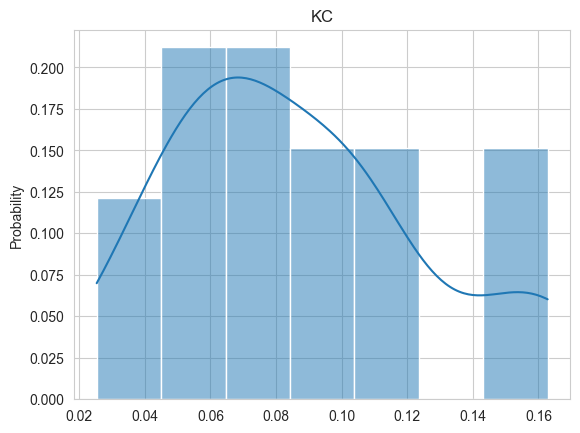

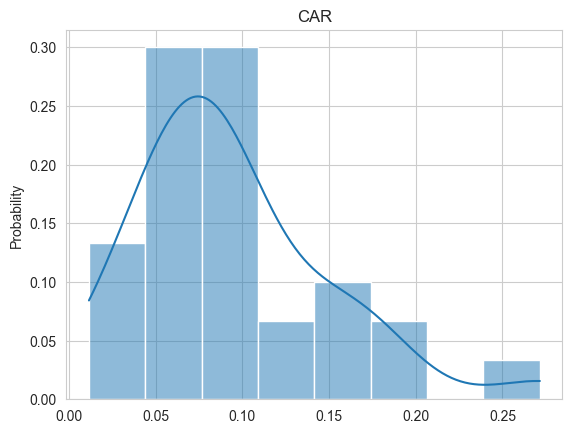

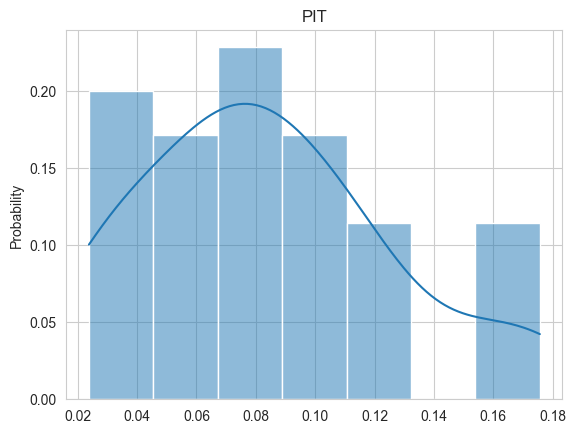

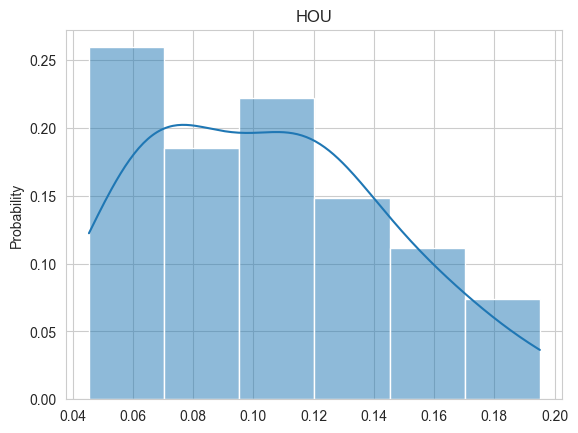

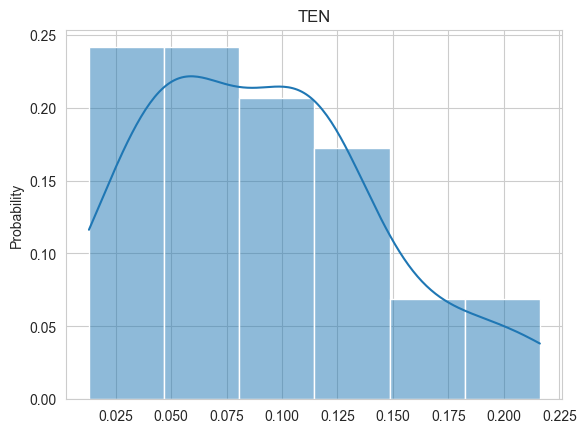

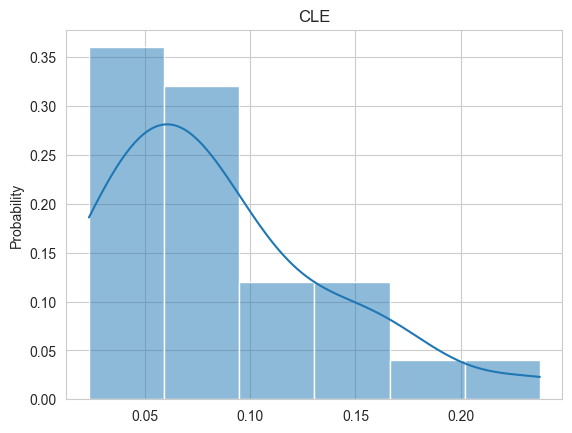

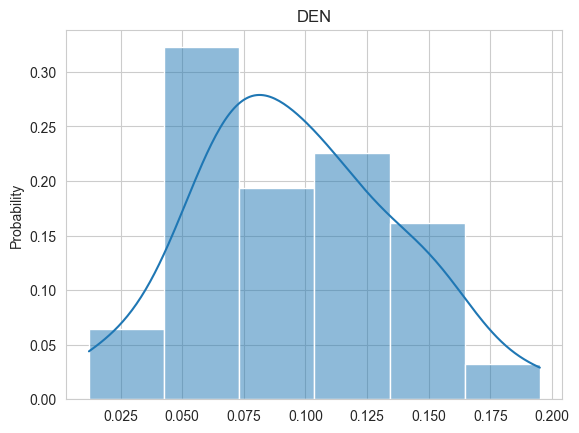

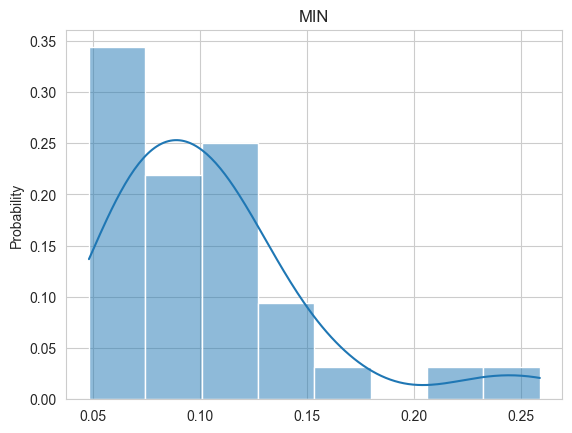

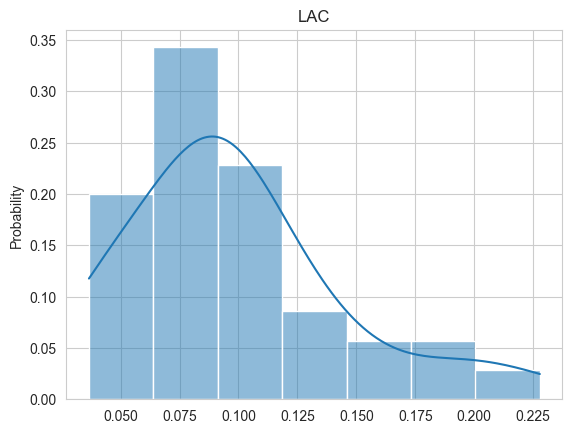

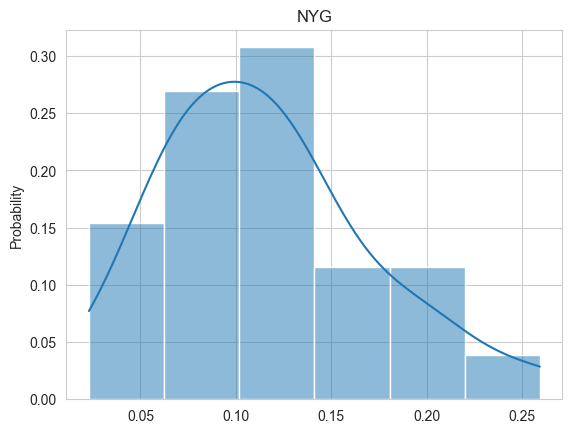

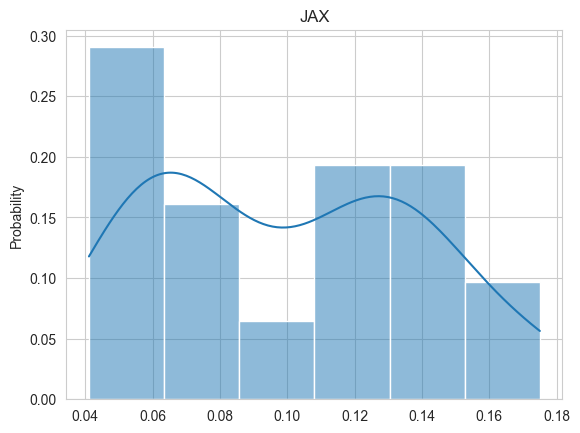

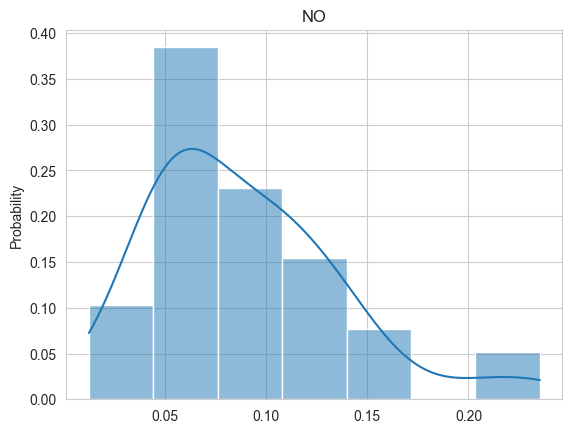

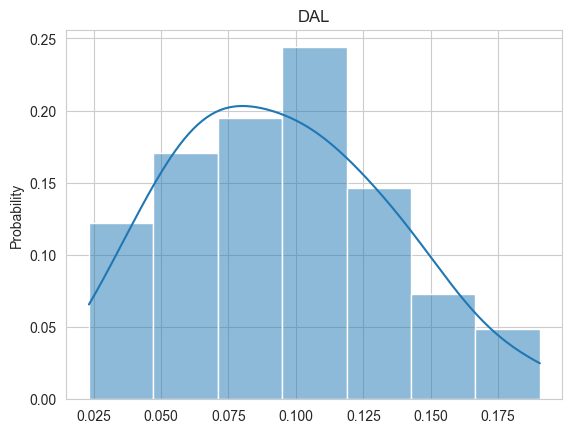

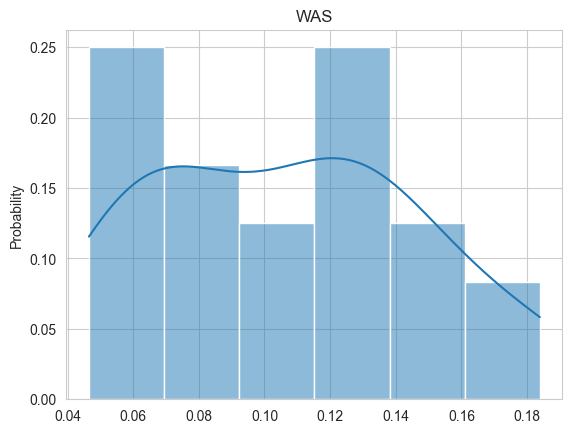

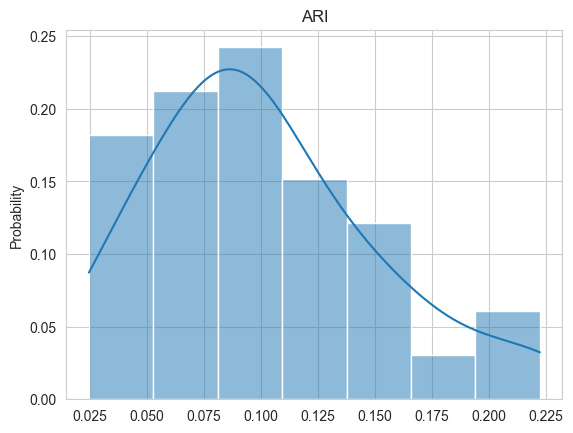

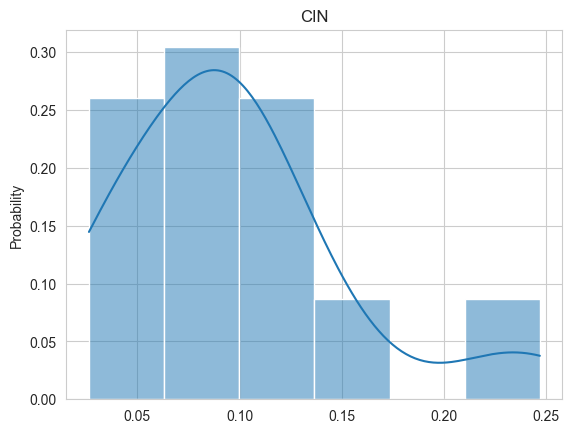

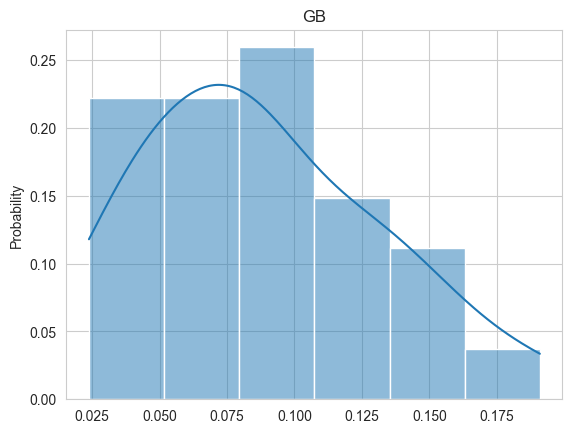

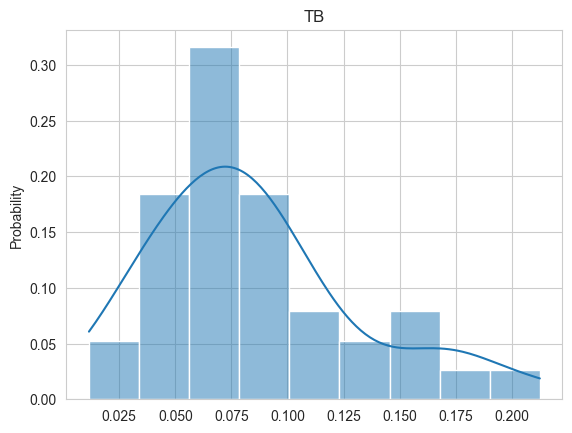

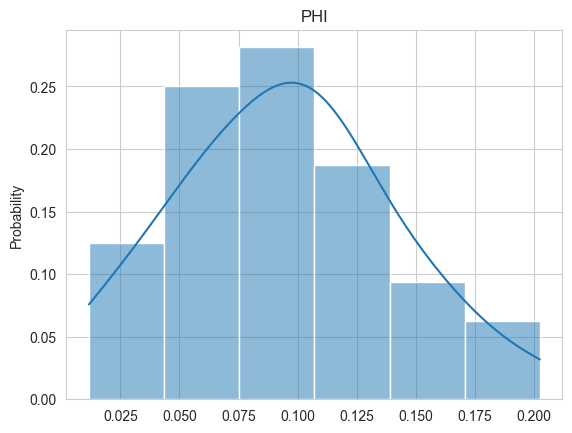

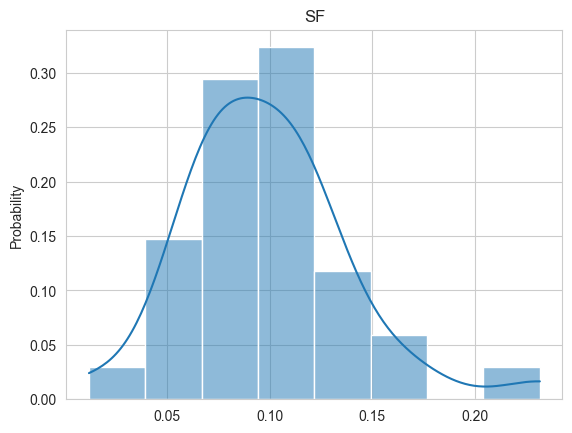

In [62]:
import json


data = json.load(open("risk_proportion_general.json"))

for i in data.keys():
    sns.histplot(data[i],kde=True, stat="probability")
    plt.title(i)
    plt.show()
    

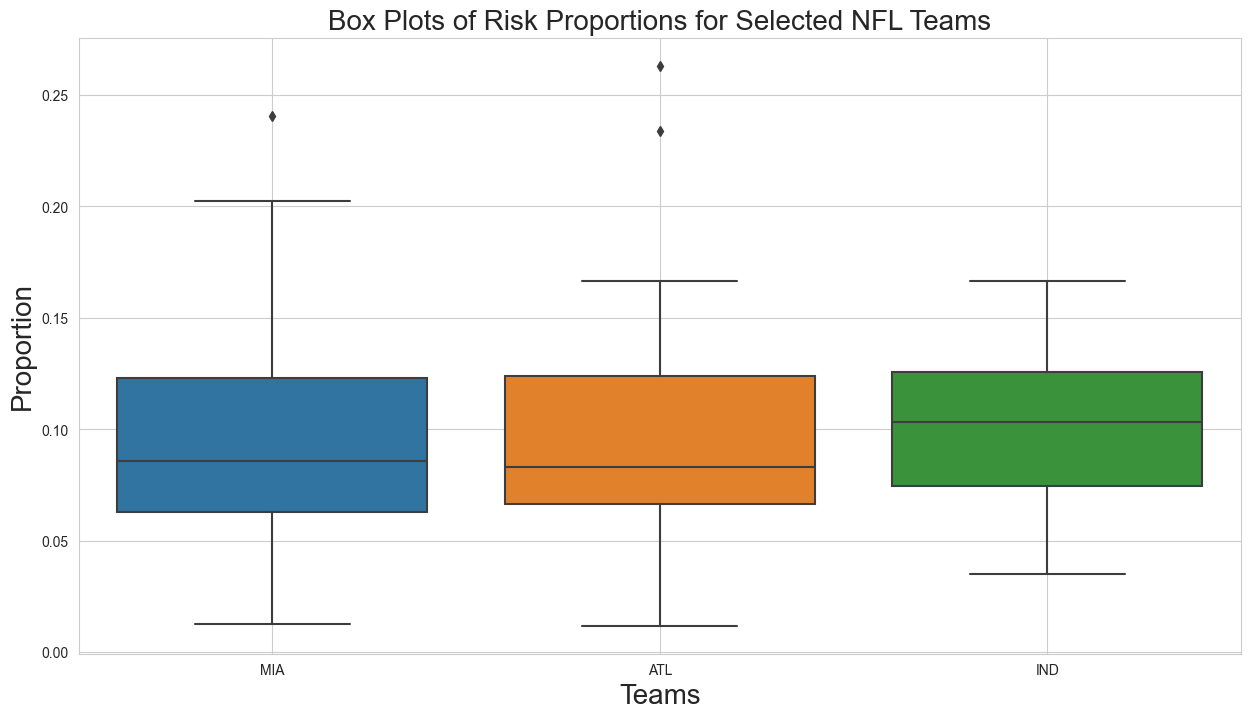

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_teams = list(data.keys())[:3]
all_values = []
teams = []
for team in selected_teams:
    all_values.extend(data[team])
    teams.extend([team] * len(data[team]))

df = pd.DataFrame({
    'Values': all_values,
    'Teams': teams
})

plt.figure(figsize=(15, 8))
sns.boxplot(x='Teams', y='Values', data=df)
plt.title("Box Plots of Risk Proportions for Selected NFL Teams", size=20)
plt.xlabel('Teams', size=20)
plt.ylabel('Proportion', size=20)
plt.grid(True)
plt.show()



In [15]:
thresholds = {}
for i in data.keys():
    thresholds[i] = np.percentile(data[i], 25)



In [20]:
import pandas as pd 
df = pd.read_csv("data/plays.csv")


In [54]:
import math 
urgency = []
for i in range(50000):
    sample = df.sample(1)
    quarter = sample["quarter"]
    down = sample["down"]
    point_differential = abs(int(float(sample["preSnapHomeScore"])) - int(float(sample["preSnapVisitorScore"])))
    urgency.append((math.sqrt(int(float(quarter)) * int(float(down))) / (1 + point_differential)))

<Axes: ylabel='Probability'>

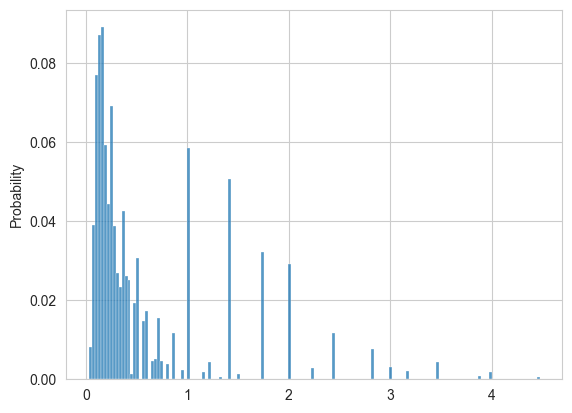

In [55]:
import seaborn as sns

sns.histplot(urgency, stat="probability")

In [57]:
urgency = np.array(urgency)
len(urgency[urgency >= 2])/ len(urgency) * 100

6.414000000000001

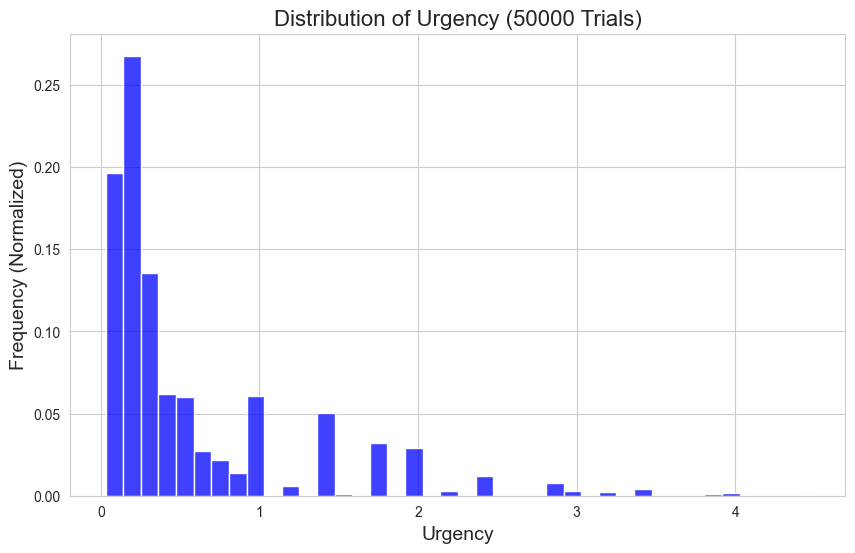

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot with a larger figure size
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(urgency, stat="probability", bins=40, color="blue")

# Adding titles and labels
plt.title("Distribution of Urgency (50000 Trials)", fontsize=16)
plt.xlabel("Urgency", fontsize=14)
plt.ylabel("Frequency (Normalized)", fontsize=14)

# Show the plot
plt.show()


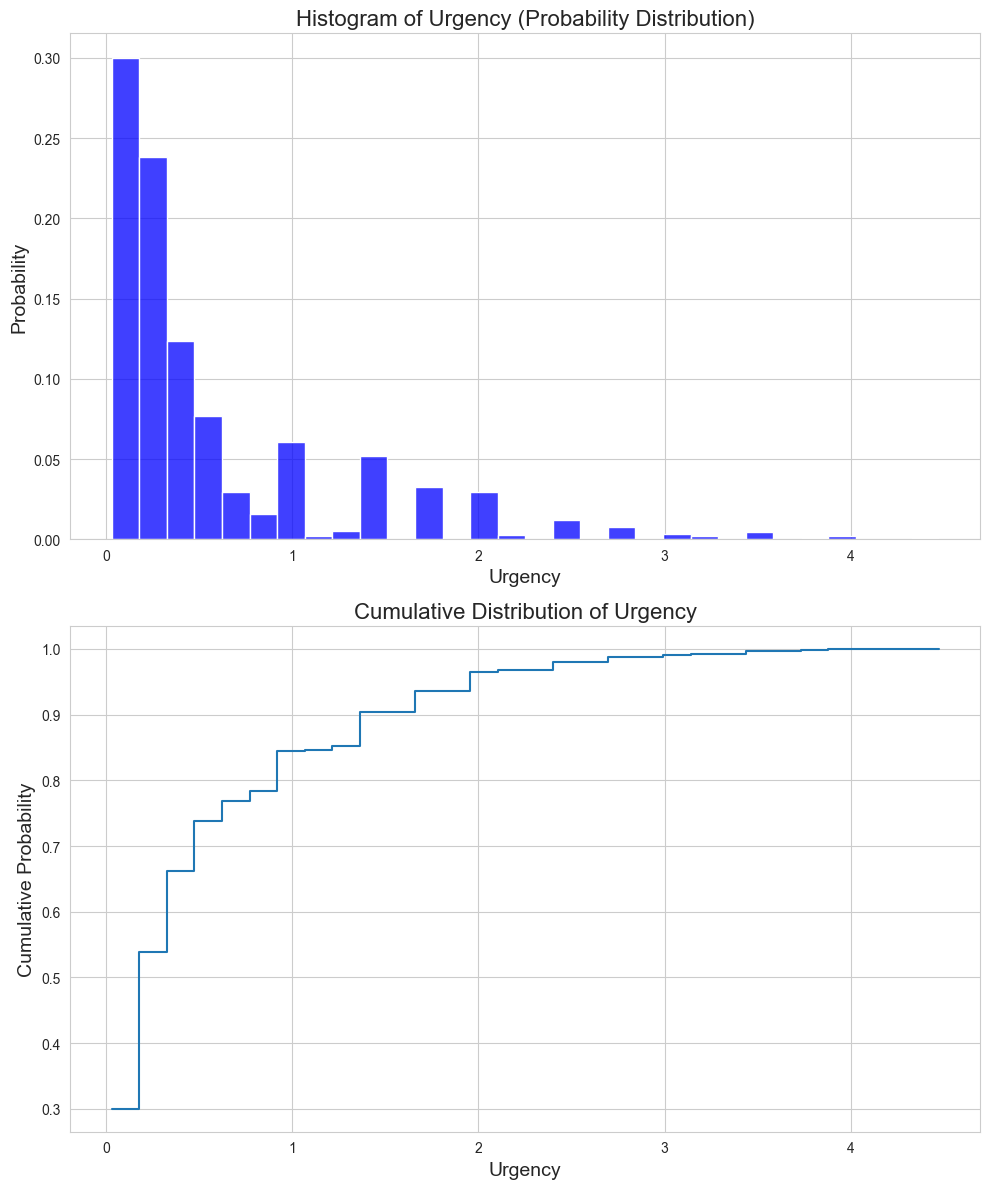

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data: Replace this with the actual 'urgency' numpy array

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Histogram with probability distribution
sns.histplot(urgency, stat="probability", bins=30, color="blue", ax=ax[0])
ax[0].set_title("Histogram of Urgency (Probability Distribution)", fontsize=16)
ax[0].set_xlabel("Urgency", fontsize=14)
ax[0].set_ylabel("Probability", fontsize=14)

# Cumulative distribution plot
sns.histplot(urgency, stat="probability", bins=30, cumulative=True, element="step", fill=False, ax=ax[1])
ax[1].set_title("Cumulative Distribution of Urgency", fontsize=16)
ax[1].set_xlabel("Urgency", fontsize=14)
ax[1].set_ylabel("Cumulative Probability", fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()
